<a href="https://colab.research.google.com/github/jmmrcp/ADE/blob/main/TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
# Instalar joypy
%pip install joypy -qU

# Verificar la versión
!python -c "import joypy; print(joypy.__version__)"

0.2.6


In [2]:
# Importaciones estándar de Python
import os
import math
from datetime import datetime
import warnings

# Manipulación de datos
import numpy as np
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hc

# Visualización de datos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D
import seaborn as sns
import joypy  # Para gráficos de densidad tipo "joyplot"

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Herramientas de visualización avanzada para clustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
# Configuración para mostrar gráficos en línea (específico para Jupyter Notebook)
%matplotlib inline

# Configuración del tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = (16, 9)  # Tamaño de las figuras: 16 pulgadas de ancho y 9 de alto

# Estilo de los gráficos
plt.style.use('seaborn-v0_8-ticks')  # Usar el estilo 'seaborn-ticks' para gráficos más atractivos

# Configuración de Seaborn
sns.set(font_scale=1)  # Escala de la fuente en los gráficos de Seaborn (1 es el tamaño predeterminado)

# Ignorar advertencias
warnings.filterwarnings('ignore')  # Suprimir advertencias para una salida más limpia

# Read Data

In [4]:
# Ruta de la carpeta donde se descargarán los datos
folder_path = '/content/EDA'

if not os.path.exists(folder_path):
    # Crear la carpeta si no existe
    os.makedirs(folder_path, exist_ok=True)
    print(f"Carpeta '{folder_path}' creada.")

    # Descargar los datos desde Google Drive usando gdown
    !gdown -q --folder 1BEIEMujLyhqZQCeLHmivMq-i1hJisqVH -O {folder_path}
    print(f"Datos descargados en '{folder_path}'.")
else:
    print(f"La carpeta '{folder_path}' ya existe. No se descargaron nuevos datos.")

La carpeta '/content/EDA' ya existe. No se descargaron nuevos datos.


In [5]:
# Ruta del archivo
file_path = '/content/EDA/Mall_Customers.csv'

# Verificar si el archivo existe
if os.path.exists(file_path):
    try:
        # Cargar el archivo CSV en un DataFrame
        data = pd.read_csv(file_path)
        print("Archivo cargado correctamente.")
        print("\nPrimeras filas del DataFrame:")
        print(data.info())  # Mostrar las primeras filas del DataFrame
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
else:
    print(f"El archivo '{file_path}' no existe. Verifica la ruta.")

Archivo cargado correctamente.

Primeras filas del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


# EDA

In [6]:
# Imprimir la forma del DataFrame
print("Forma del DataFrame (filas, columnas):", data.shape)

# Mostrar las primeras filas del DataFrame
print("\nPrimeras 5 filas del DataFrame:")
display(data.head())  # Usar display para una mejor visualización en Jupyter Notebook

Forma del DataFrame (filas, columnas): (200, 5)

Primeras 5 filas del DataFrame:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


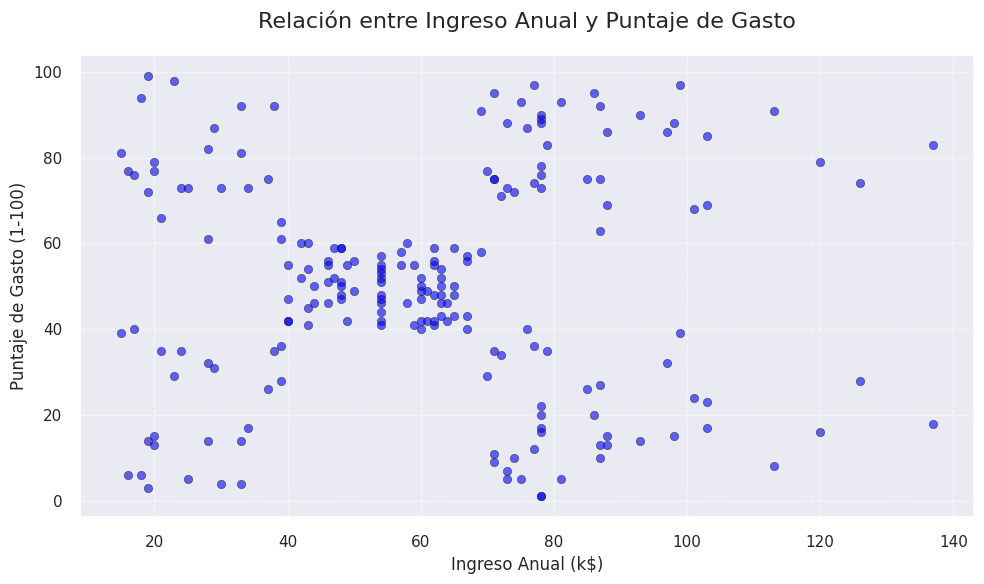

In [7]:
# Crear la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(
    x=data['Annual Income (k$)'],  # Eje x: Ingreso anual
    y=data['Spending Score (1-100)'],  # Eje y: Puntaje de gasto
    c='blue',  # Color de los puntos
    alpha=0.6,  # Transparencia de los puntos
    edgecolor='k',  # Borde negro para los puntos
    linewidth=0.5  # Grosor del borde
)

# Títulos y etiquetas
plt.title('Relación entre Ingreso Anual y Puntaje de Gasto', fontsize=16, pad=20)
plt.xlabel('Ingreso Anual (k$)', fontsize=12)
plt.ylabel('Puntaje de Gasto (1-100)', fontsize=12)

# Añadir una cuadrícula para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [8]:
# Verificar si la columna 'CustomerID' existe en el DataFrame
if 'CustomerID' in data.columns:
    # Eliminar la columna 'CustomerID'
    data.drop('CustomerID', axis=1, inplace=True)
    print("La columna 'CustomerID' ha sido eliminada.")
else:
    print("La columna 'CustomerID' no existe en el DataFrame.")

La columna 'CustomerID' ha sido eliminada.


In [9]:
# Verificar si hay filas duplicadas antes de eliminarlas
if data.duplicated().any():
    print("Se encontraron filas duplicadas. Eliminándolas...")
    # Eliminar filas duplicadas
    data.drop_duplicates(inplace=True)
    print("Filas duplicadas eliminadas.")
else:
    print("No se encontraron filas duplicadas.")

No se encontraron filas duplicadas.


In [10]:
# Verificar valores faltantes en cada columna
missing_values = data.isna().sum()

# Mostrar el resultado de manera más clara
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
# Diccionario con los nuevos nombres de las columnas
new_names = {
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
}

In [12]:
# Verificar si las columnas a renombrar existen en el DataFrame
existing_columns = data.columns
columns_to_rename = {k: v for k, v in new_names.items() if k in existing_columns}

if columns_to_rename:
    # Renombrar las columnas
    data.rename(columns=columns_to_rename, inplace=True)
    print("Columnas renombradas correctamente.")
    print("\nNuevos nombres de las columnas:")
    print(data.columns.tolist())
else:
    print("No se encontraron columnas para renombrar. Verifica los nombres.")

Columnas renombradas correctamente.

Nuevos nombres de las columnas:
['gender', 'age', 'annual_income', 'spending_score']


In [13]:
# Verificar y convertir los tipos de datos
if 'age' in data.columns:
    data['age'] = data['age'].astype('int8')
    print("Columna 'age' convertida a int8.")
else:
    print("La columna 'age' no existe en el DataFrame.")

if 'annual_income' in data.columns:
    data['annual_income'] = data['annual_income'].astype('int16')
    print("Columna 'annual_income' convertida a int16.")
else:
    print("La columna 'annual_income' no existe en el DataFrame.")

if 'spending_score' in data.columns:
    data['spending_score'] = data['spending_score'].astype('int8')
    print("Columna 'spending_score' convertida a int8.")
else:
    print("La columna 'spending_score' no existe en el DataFrame.")

# Verificar el uso de memoria después de la conversión
print("\nUso de memoria después de la optimización:")
print(data.info(memory_usage='deep'))

Columna 'age' convertida a int8.
Columna 'annual_income' convertida a int16.
Columna 'spending_score' convertida a int8.

Uso de memoria después de la optimización:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int8  
 2   annual_income   200 non-null    int16 
 3   spending_score  200 non-null    int8  
dtypes: int16(1), int8(2), object(1)
memory usage: 13.0 KB
None


In [14]:
# Verificar si la columna 'gender' existe en el DataFrame
if 'gender' in data.columns:
    # Convertir la columna 'gender' a tipo categórico y asignar códigos numéricos
    data['GENERO'] = data['gender'].astype('category').cat.codes

    # Mostrar un mensaje de confirmación
    print("Columna 'GENERO' creada correctamente.")

    # Mostrar el mapeo de categorías a códigos numéricos
    category_mapping = dict(enumerate(data['gender'].astype('category').cat.categories))
    print("\nMapeo de categorías a códigos numéricos:")
    print(category_mapping)

    # Mostrar las primeras filas del DataFrame con la nueva columna
    print("\nPrimeras filas del DataFrame con la columna 'GENERO':")
    print(data[['gender', 'GENERO']].head())
else:
    print("La columna 'gender' no existe en el DataFrame. Verifica los nombres de las columnas.")

Columna 'GENERO' creada correctamente.

Mapeo de categorías a códigos numéricos:
{0: 'Female', 1: 'Male'}

Primeras filas del DataFrame con la columna 'GENERO':
   gender  GENERO
0    Male       1
1    Male       1
2  Female       0
3  Female       0
4  Female       0


In [15]:
# Seleccionar las columnas 'age' y 'annual_income' y convertirlas en un array NumPy
X = data.iloc[:, [2, 3]].values

# Verificar el resultado
print("Forma del array X:", X.shape)
print("\nPrimeras filas de X:")
print(X[:5])  # Mostrar las primeras 5 filas del array

Forma del array X: (200, 2)

Primeras filas de X:
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [16]:
# Seleccionar las columnas numéricas
num_columns = data.select_dtypes(include=['number']).columns

# Verificar si se encontraron columnas numéricas
if len(num_columns) > 0:
    print("Columnas numéricas en el DataFrame:")
    print(num_columns.tolist())  # Convertir a lista para una salida más clara
else:
    print("No se encontraron columnas numéricas en el DataFrame.")

Columnas numéricas en el DataFrame:
['age', 'annual_income', 'spending_score', 'GENERO']


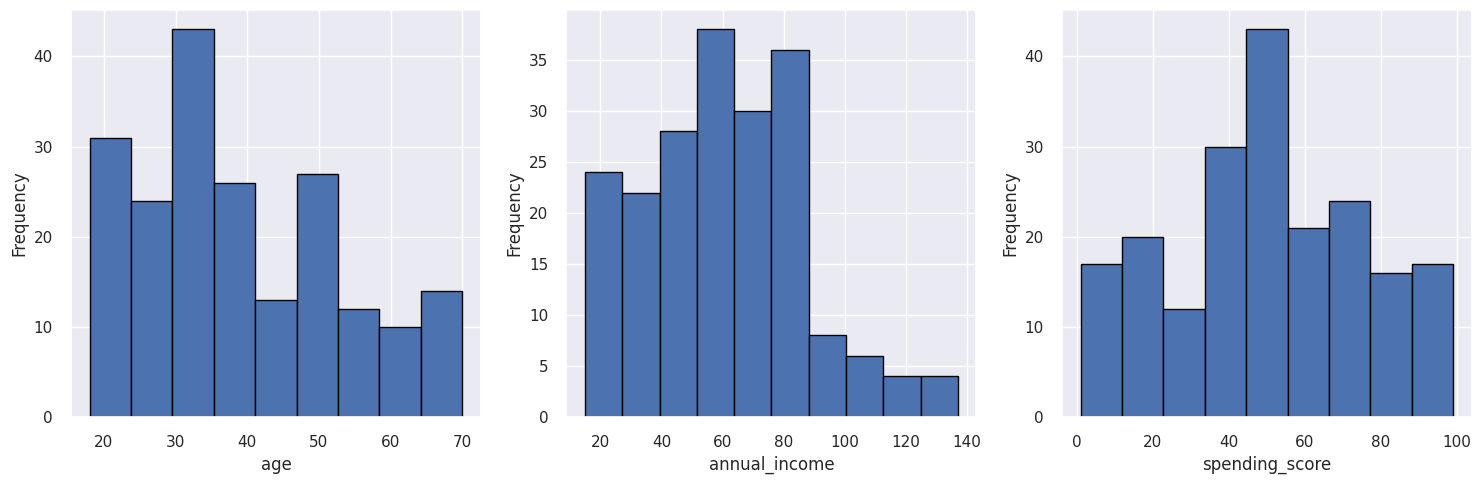

In [17]:
num_columns_subset = num_columns[:3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_columns_subset):
    axes[i].hist(
        x=data[col],  # Datos de la columna
        bins='auto',  # Número automático de bins
        edgecolor='black'  # Borde negro en las barras
    )
    # axes[i].set_title(col)  # Título del subplot
    axes[i].set_xlabel(col)  # Etiqueta del eje x
    axes[i].set_ylabel('Frequency')  # Etiqueta del eje y

# Ajustar el espacio entre los subplots para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()

In [18]:
# Seleccionar las columnas categóricas (no numéricas)
cat_columns = data.select_dtypes(exclude=['number']).columns

# Verificar si se encontraron columnas categóricas
if len(cat_columns) > 0:
    print("Columnas categóricas en el DataFrame:")
    print(cat_columns.tolist())  # Convertir a lista para una salida más clara
else:
    print("No se encontraron columnas categóricas en el DataFrame.")

Columnas categóricas en el DataFrame:
['gender']


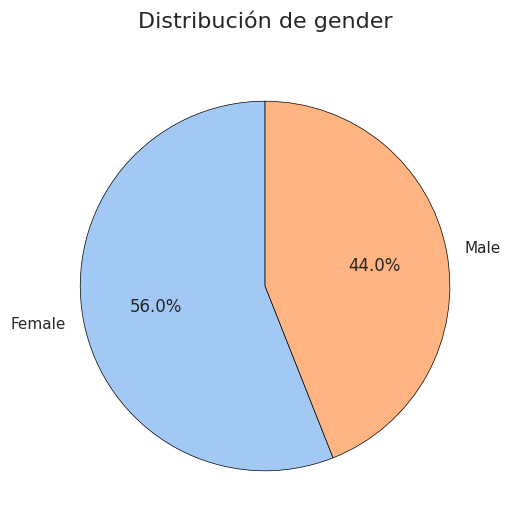

In [19]:
# Iterar sobre las columnas categóricas
for col in cat_columns:
    # Obtener los conteos de valores únicos
    catcol_counts = data[col].value_counts()

    # Crear el gráfico de pastel
    plt.figure(figsize=(6, 6))  # Tamaño de la figura
    plt.pie(
        x=catcol_counts,  # Valores para el gráfico
        labels=catcol_counts.index,  # Etiquetas de las categorías
        autopct='%1.1f%%',  # Mostrar porcentajes con 1 decimal
        startangle=90,  # Rotar el gráfico para que empiece desde arriba
        colors=sns.color_palette('pastel'),  # Usar una paleta de colores suaves
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}  # Borde negro para las porciones
    )

    # Título del gráfico
    plt.title(f'Distribución de {col}', fontsize=16, pad=20)

    # Mostrar el gráfico
    plt.show()

In [20]:
# Número de columnas en la cuadrícula de gráficos
n_cols = 3

# Calcular el número de filas necesarias
n_rows = math.ceil(len(num_columns) / n_cols)

# Verificar si hay columnas numéricas
if len(num_columns) > 0:
    print(f"Número de columnas numéricas: {len(num_columns)}")
    print(f"Organizadas en {n_rows} filas y {n_cols} columnas.")
else:
    print("No hay columnas numéricas para organizar.")

Número de columnas numéricas: 4
Organizadas en 2 filas y 3 columnas.


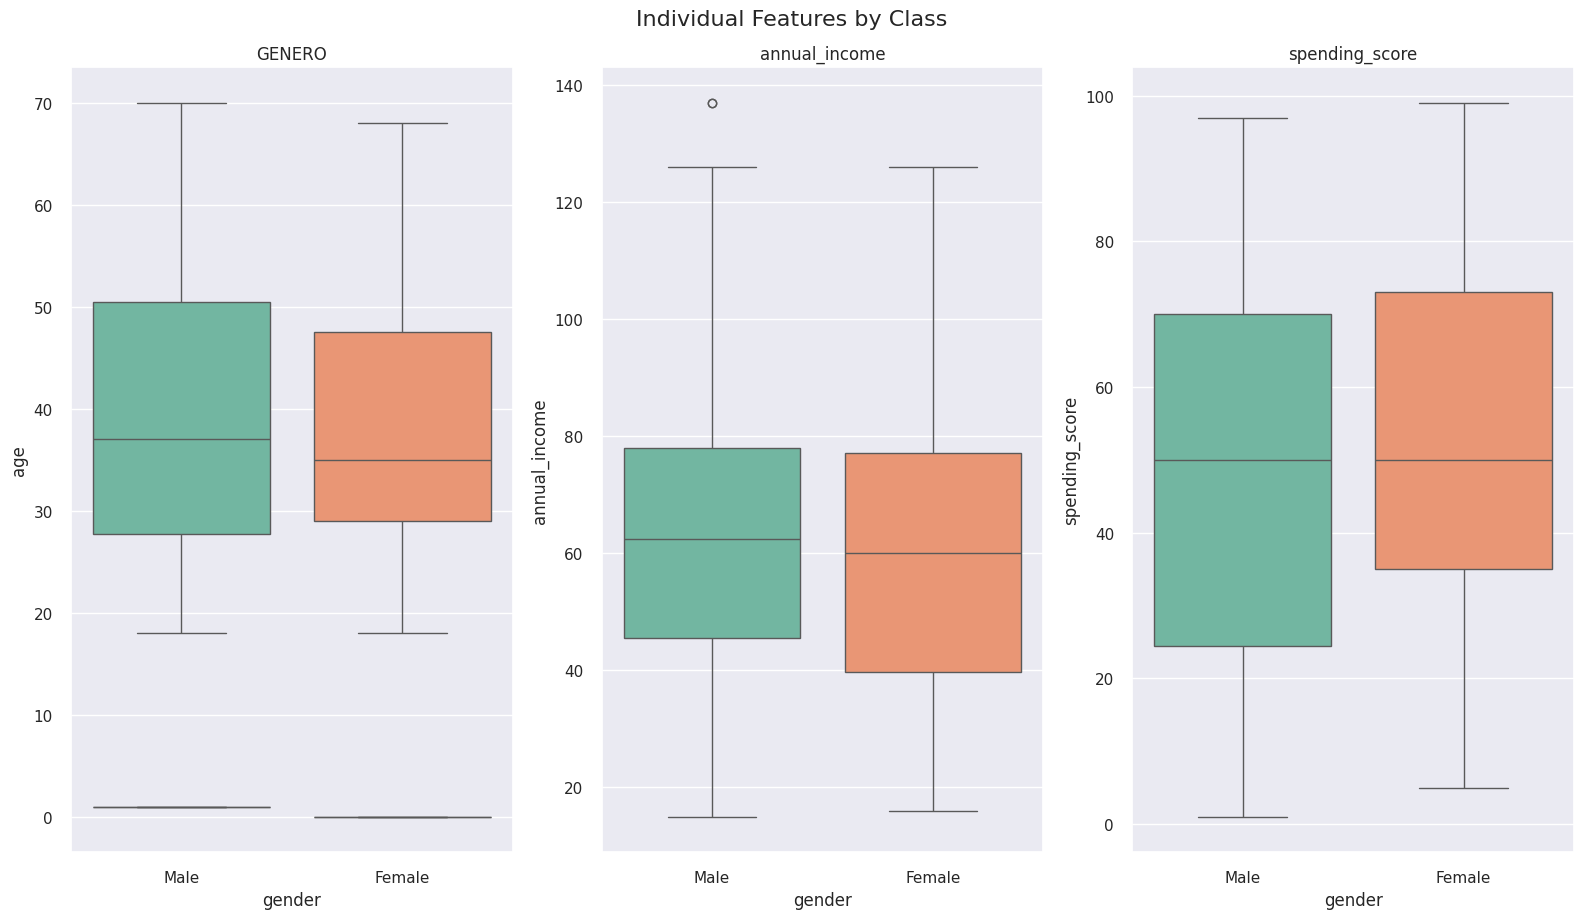

In [21]:
# Crear la figura y los ejes
fig, ax = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(16, 9)
)

# Inicializar contadores para filas y columnas
row = 0
col = 0

# Definir una paleta de colores
palette = "Set2"  # Puedes usar otras paletas como "viridis", "coolwarm", "husl", etc.

# Iterar sobre las columnas numéricas
for i, column in enumerate(num_columns):
    if col > 2:  # Si se superan 3 columnas, reiniciar
        row += 1
        col = 0
    axes = ax[col]  # Seleccionar el subplot actual
    sns.boxplot(
        x=data['gender'],  # Variable categórica en el eje x
        y=data[column],    # Variable numérica en el eje y
        ax=axes,           # Especificar el subplot actual
        palette=palette    # Asignar una paleta de colores
    )
    axes.set_title(column)  # Título del subplot
    col += 1  # Moverse a la siguiente columna

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Título general de la figura
fig.suptitle("Individual Features by Class", fontsize=16, y=1.02)

# Mostrar la figura
plt.show()

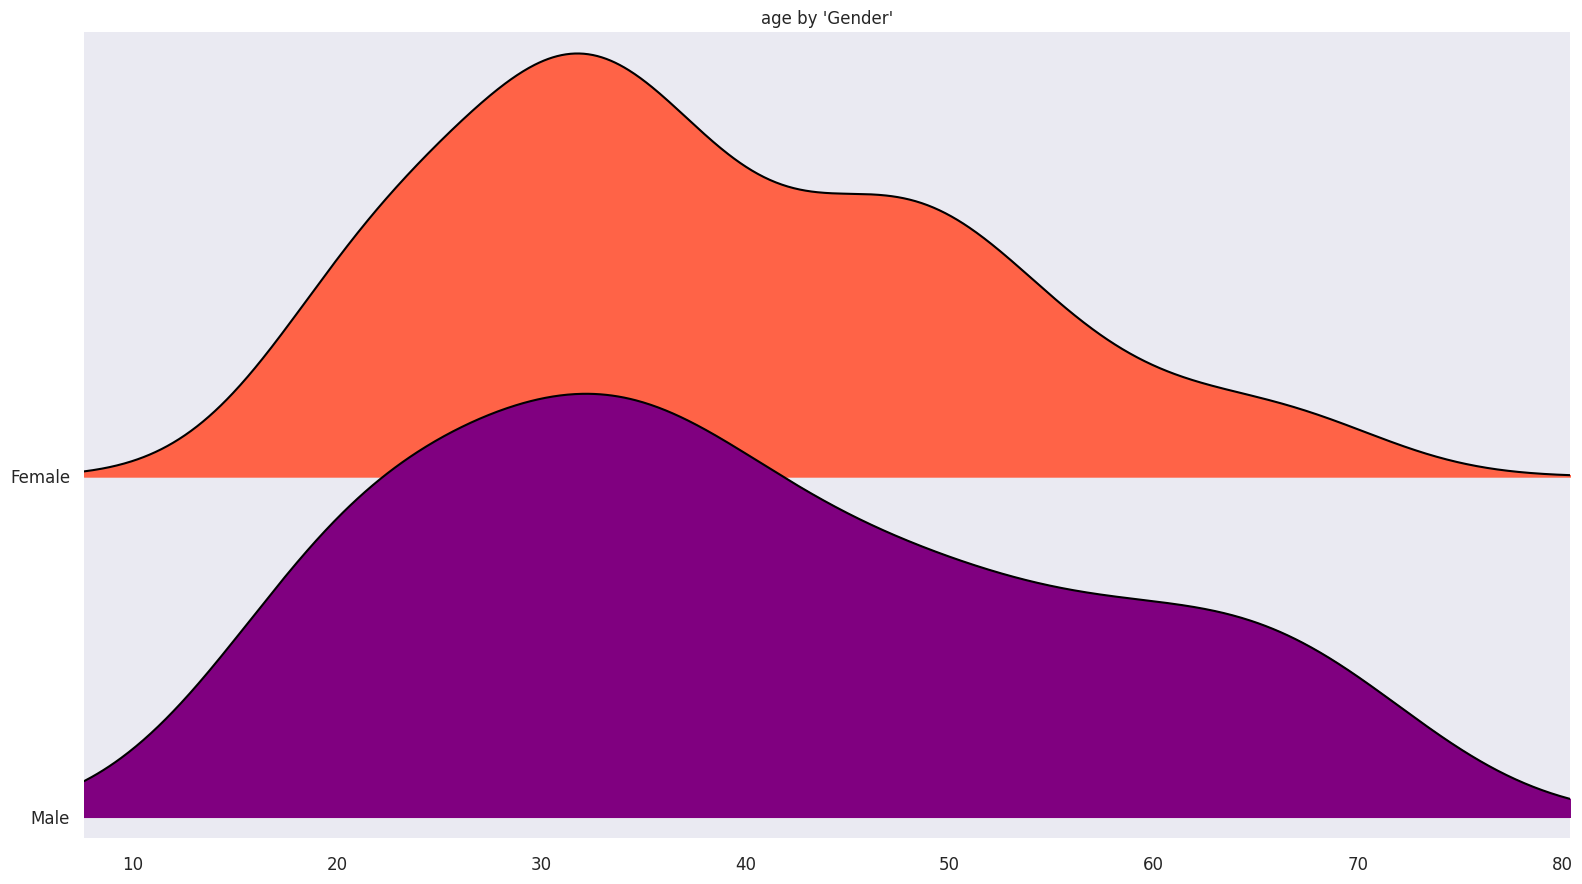

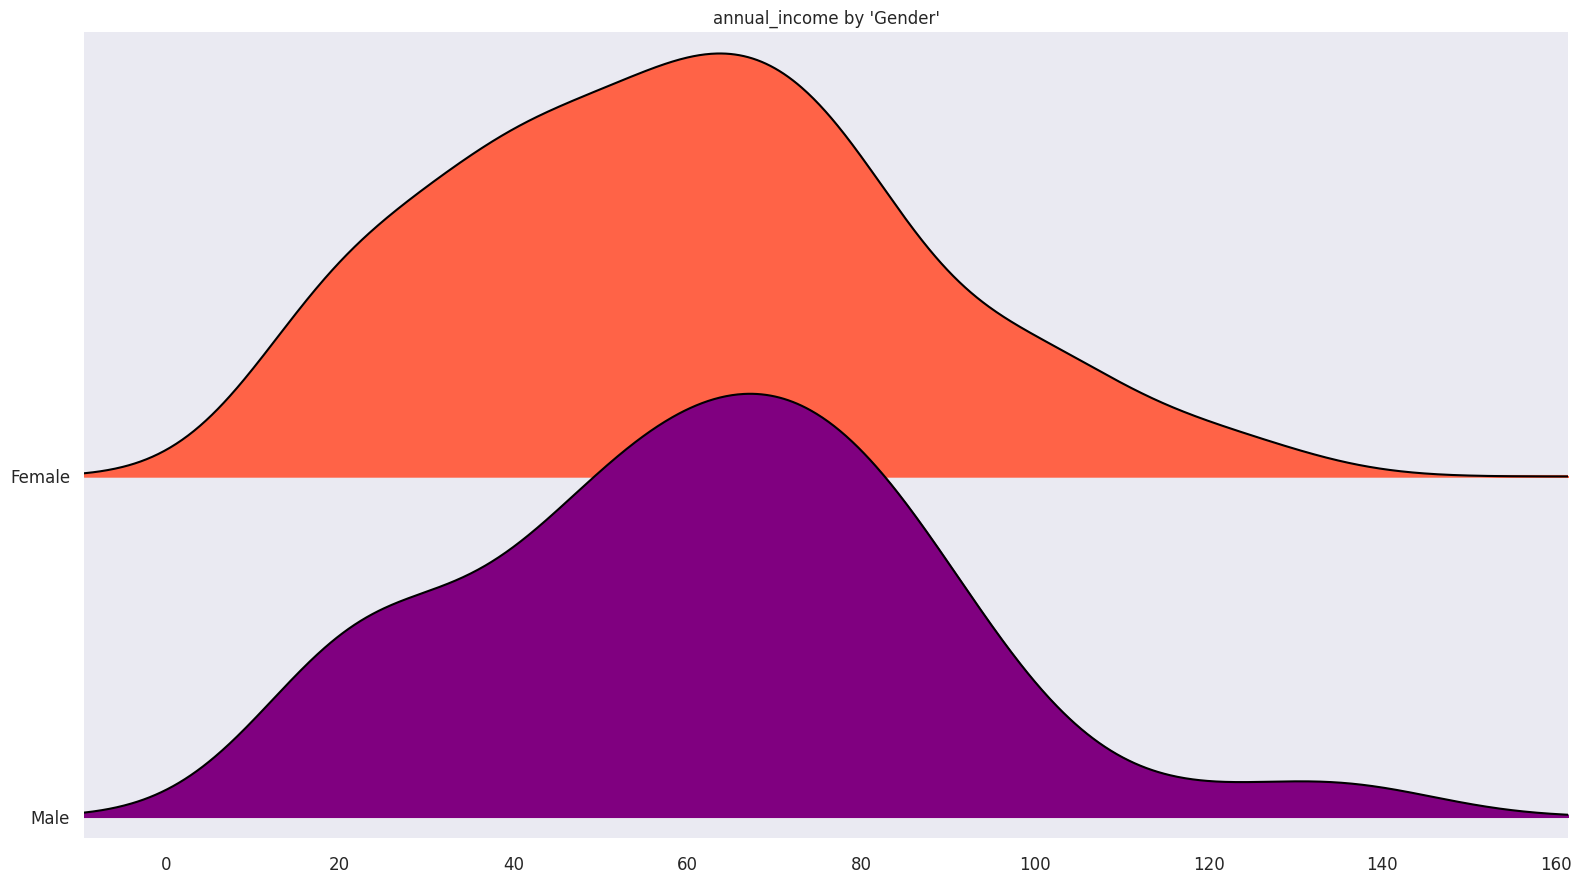

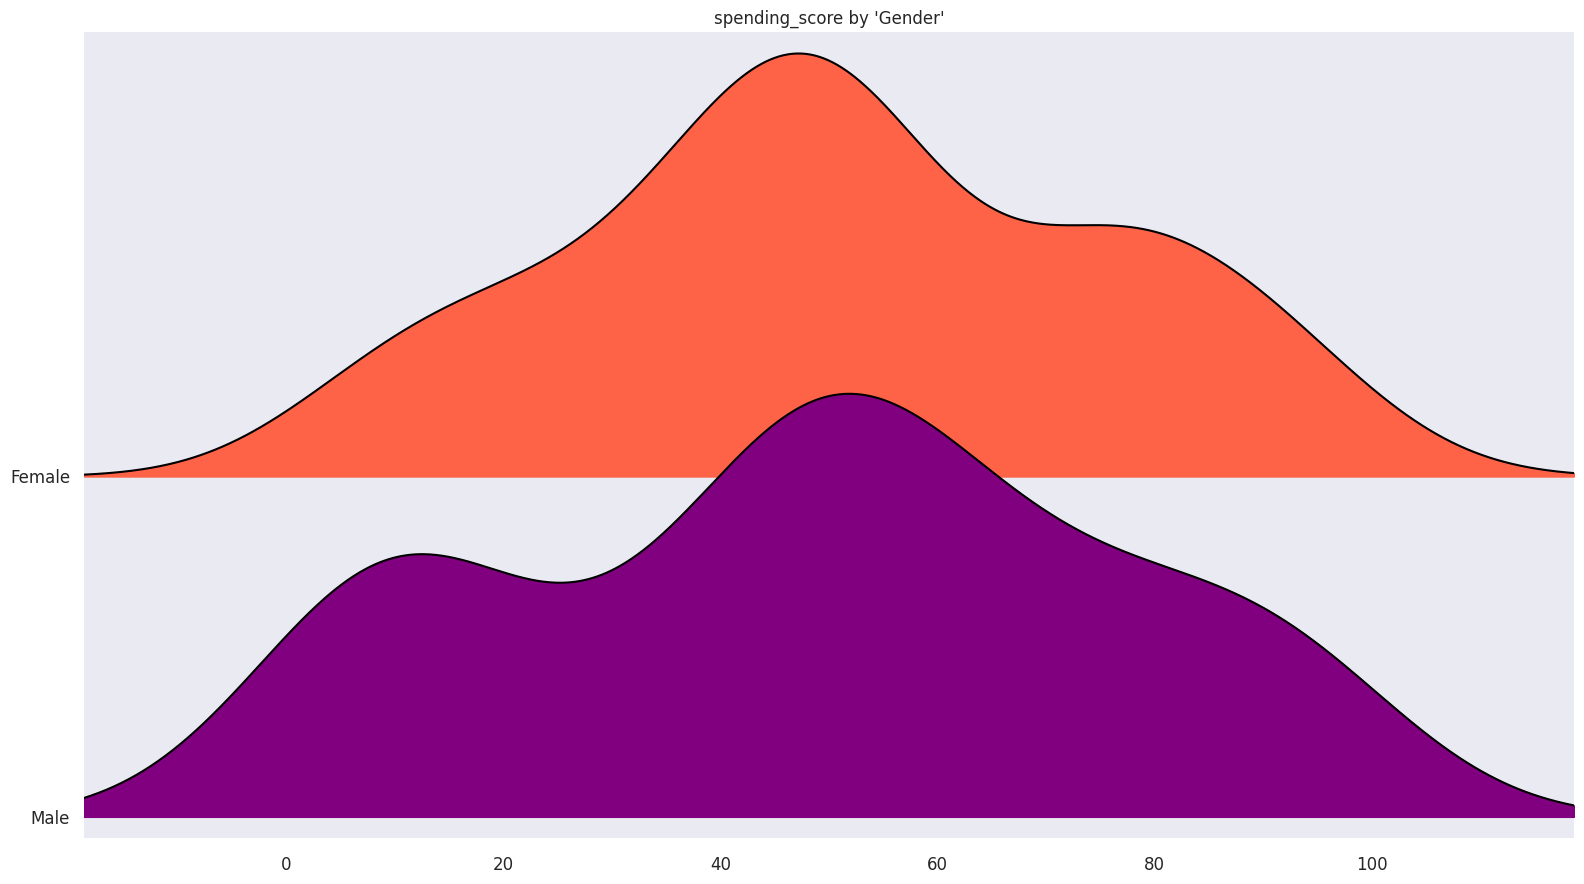

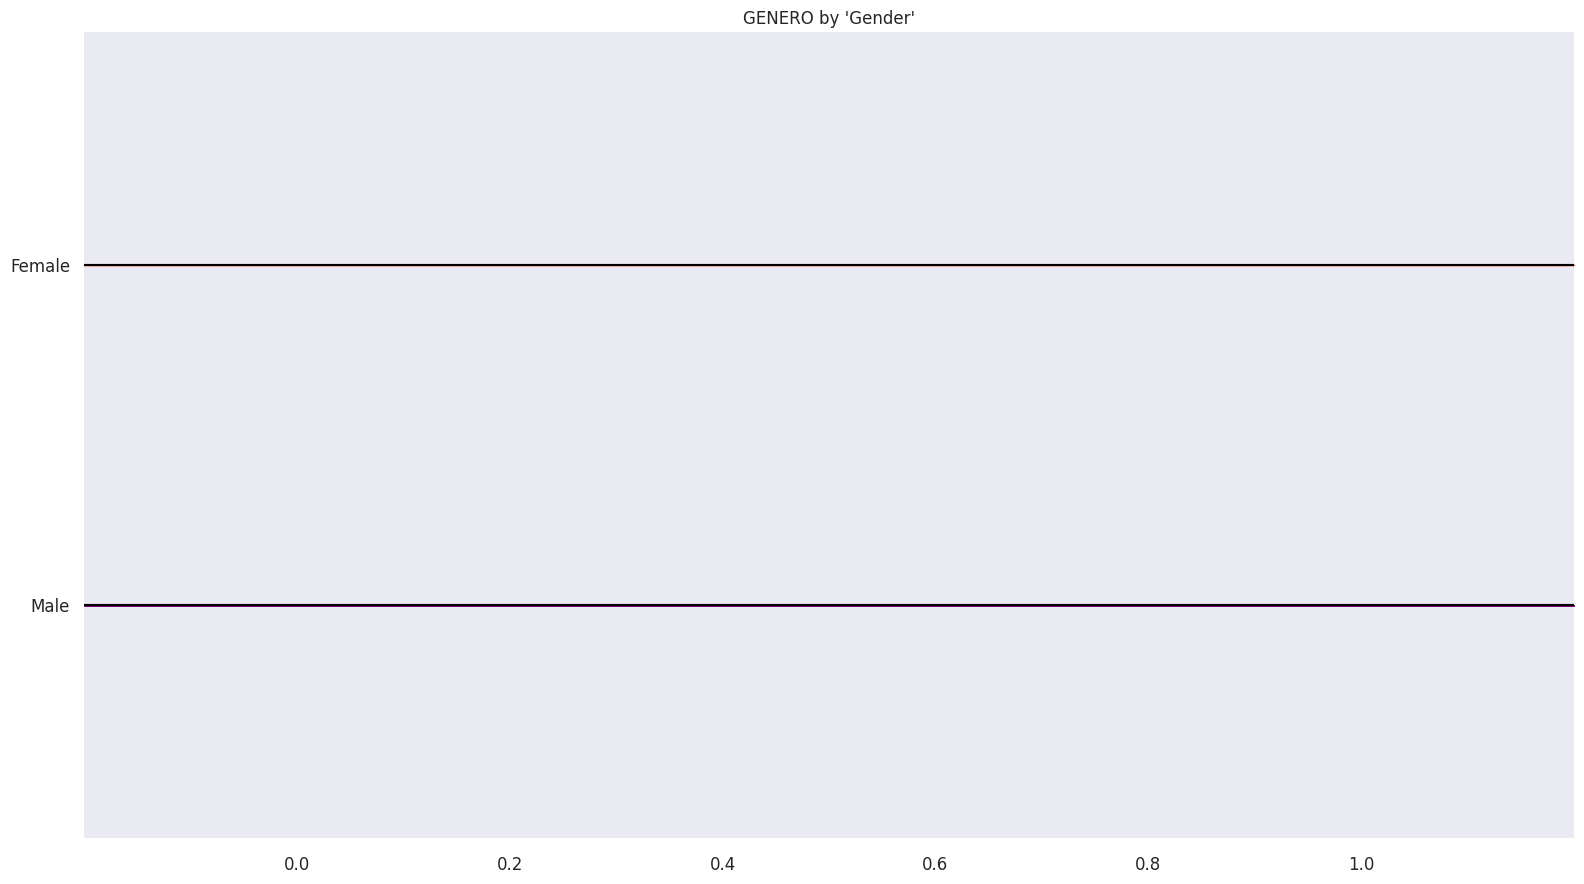

In [22]:
# Iterar sobre las columnas numéricas
for i, var in enumerate(num_columns):
    # Crear un joyplot para cada columna numérica, agrupado por 'gender'
    joypy.joyplot(
        data = data,
        column=[var],  # Columna numérica
        by="gender",   # Variable categórica para agrupar
        ylim='own',    # Cada subplot tiene su propio límite en el eje y
        figsize=(16, 9),  # Tamaño de la figura
        color=['tomato', 'purple'],  # Colores para las categorías de 'gender'
        title=f"{var} by 'Gender'",  # Título del gráfico
        linecolor='black',  # Color de las líneas de contorno
        overlap=1.5,  # Solapamiento entre las curvas
    )
    plt.show()  # Mostrar cada gráfico por separado

In [23]:
# Verificar si la columna 'gender' existe en el DataFrame
if 'gender' in data.columns:
    # Crear el codificador
    enc = OrdinalEncoder()

    # Codificar la columna 'gender'
    data['gender'] = enc.fit_transform(data[['gender']])

    # Mostrar un mensaje de confirmación
    print("Columna 'gender' codificada correctamente.")

    # Mostrar el mapeo de categorías a códigos numéricos
    category_mapping = {i: category for i, category in enumerate(enc.categories_[0])}
    print("\nMapeo de categorías a códigos numéricos:")
    print(category_mapping)

    # Mostrar la distribución de los códigos numéricos
    print("\nDistribución de la columna 'gender' codificada:")
    print(data['gender'].value_counts())
else:
    print("La columna 'gender' no existe en el DataFrame. Verifica los nombres de las columnas.")

Columna 'gender' codificada correctamente.

Mapeo de categorías a códigos numéricos:
{0: 'Female', 1: 'Male'}

Distribución de la columna 'gender' codificada:
gender
0.0    112
1.0     88
Name: count, dtype: int64


In [24]:
# Parámetros iniciales para el modelo K-Means
kmeans_kwargs = {
    "init": "random",  # Inicialización aleatoria de los centroides
    "n_init": 10,      # Número de inicializaciones para elegir la mejor
    "max_iter": 300,   # Número máximo de iteraciones por inicialización
    "random_state": 42, # Semilla para reproducibilidad
}

# Mensaje informativo
print("Parámetros iniciales para K-Means:")
for key, value in kmeans_kwargs.items():
    print(f"{key}: {value}")

Parámetros iniciales para K-Means:
init: random
n_init: 10
max_iter: 300
random_state: 42


In [25]:
# Lista para almacenar la suma de los errores cuadráticos (SSE)
sse = []

# Rango de valores de k (número de clusters)
k_range = range(1, 11)

# Calcular SSE para cada valor de k
for k in k_range:
    # Crear el modelo K-Means
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)

    # Ajustar el modelo a los datos
    kmeans.fit(X)

    # Almacenar el valor de SSE (inercia)
    sse.append(kmeans.inertia_)
    print(f"k = {k}: SSE = {kmeans.inertia_:.2f}")

k = 1: SSE = 269981.28
k = 2: SSE = 181363.60
k = 3: SSE = 106348.37
k = 4: SSE = 73679.79
k = 5: SSE = 44448.46
k = 6: SSE = 37564.94
k = 7: SSE = 31280.90
k = 8: SSE = 25063.65
k = 9: SSE = 21826.94
k = 10: SSE = 20298.39


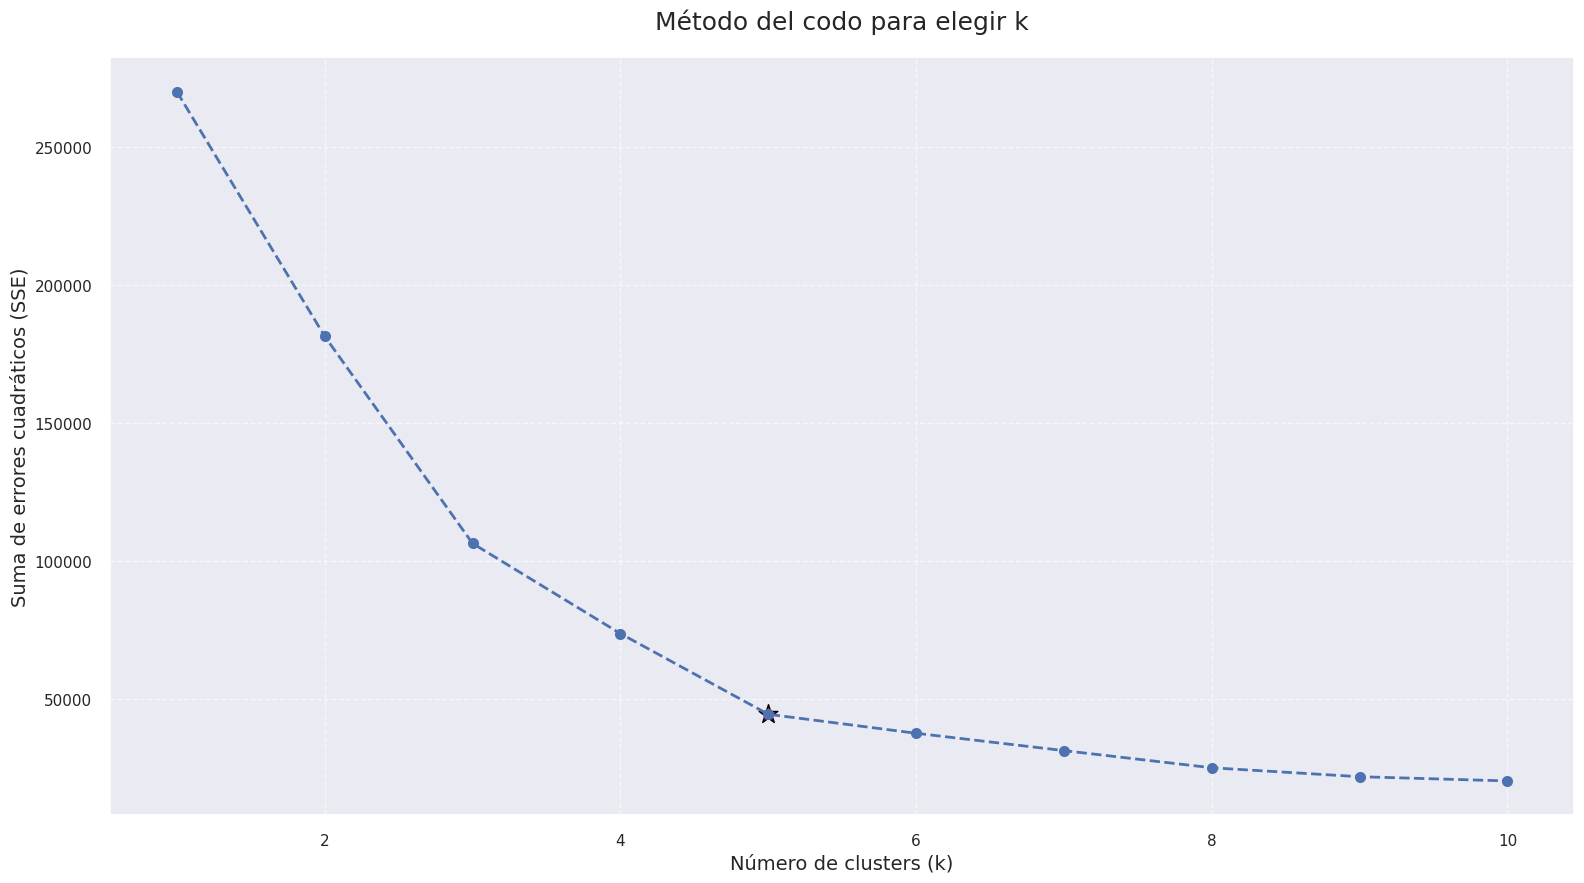

In [26]:
plt.figure(figsize=(16, 9))  # Tamaño de la figura

# Graficar la curva de SSE
plt.plot(
    range(1, 11),  # Eje x: Número de clusters (k)
    sse,            # Eje y: Suma de errores cuadráticos (SSE)
    marker='o',     # Marcador para cada punto
    linestyle='--', # Estilo de línea
    color='b',      # Color de la línea
    linewidth=2,    # Grosor de la línea
    markersize=8    # Tamaño de los marcadores
)

# Resaltar el punto óptimo (k=5)
plt.scatter(
    5,              # Valor de k
    sse[4],         # Valor de SSE para k=5
    s=200,          # Tamaño del marcador
    c='red',        # Color del marcador
    marker='*',     # Forma del marcador (estrella)
    edgecolor='black',  # Borde del marcador
    linewidth=1     # Grosor del borde
)

# Títulos y etiquetas
plt.title('Método del codo para elegir k', fontsize=18, pad=20)
plt.xlabel('Número de clusters (k)', fontsize=14)
plt.ylabel('Suma de errores cuadráticos (SSE)', fontsize=14)

# Añadir una cuadrícula para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [27]:
# Configuración del modelo K-Means
kmeans = KMeans(
    init="k-means++",  # Inicialización inteligente de centroides
    n_clusters=5,      # Número de clusters
    random_state=111   # Semilla para reproducibilidad
)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Predecir los clusters para cada punto de datos
pred = kmeans.predict(X)

# Asignar los clusters al DataFrame original
data['KMeans_Cluster'] = pred

# Contar el número de puntos de datos en cada cluster
cluster_counts = data['KMeans_Cluster'].value_counts().sort_index()
print('Number of data points in each cluster: \n', cluster_counts)

Number of data points in each cluster: 
 KMeans_Cluster
0    39
1    23
2    22
3    36
4    80
Name: count, dtype: int64


In [28]:
# Imprimir las etiquetas de los clusters
print(pred)

[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 4 1 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 3 0 4 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 4 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


Componentes principales (primeras filas):
         PC1        PC2        PC3       PC4       PC5           PC6
0 -31.587407 -33.243369 -22.161490 -1.796906  0.855903  1.694110e-13
1   1.183514 -56.836978 -10.540285  0.032992  0.942061  1.887388e-13
2 -57.259616 -13.557249 -28.780024 -2.446813 -0.616160 -1.315149e-13
3  -1.772473 -53.495921  -9.511932 -0.037901 -0.485155 -1.020564e-13
4 -31.910675 -30.634211 -10.245924 -1.903611 -0.591748 -1.225915e-13


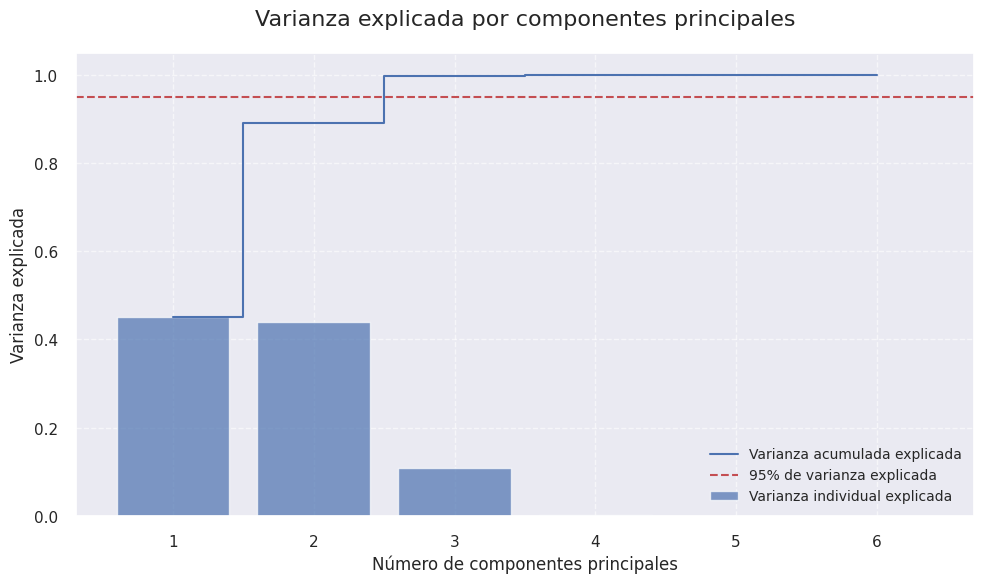

In [29]:
# Aplicar PCA a los datos
pca = PCA()  # Crear un objeto PCA
pca_data = pca.fit_transform(data)  # Ajustar y transformar los datos

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
data['PC1'] = pca_data[:, 0]  # Primer componente principal
data['PC2'] = pca_data[:, 1]  # Segundo componente principal

# Mostrar las primeras filas del DataFrame de componentes principales
print("Componentes principales (primeras filas):")
print(pca_df.head())

# Graficar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(
    range(1, pca.n_components_ + 1),  # Rango de componentes
    pca.explained_variance_ratio_,  # Varianza explicada por cada componente
    alpha=0.7,  # Transparencia de las barras
    align='center',  # Alineación de las barras
    label='Varianza individual explicada'  # Etiqueta para la leyenda
)

# Graficar la varianza acumulada explicada
plt.step(
    range(1, pca.n_components_ + 1),  # Rango de componentes
    pca.explained_variance_ratio_.cumsum(),  # Varianza acumulada explicada
    where='mid',  # Punto de referencia para el paso
    label='Varianza acumulada explicada'  # Etiqueta para la leyenda
)

# Añadir una línea horizontal para el umbral de varianza (opcional)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de varianza explicada')

# Títulos y etiquetas
plt.title('Varianza explicada por componentes principales', fontsize=16, pad=20)
plt.xlabel('Número de componentes principales', fontsize=12)
plt.ylabel('Varianza explicada', fontsize=12)

# Añadir una cuadrícula para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la leyenda
plt.legend(loc='best', fontsize=10)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [30]:
# Obtener la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Mostrar la varianza explicada
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)

# Mostrar la varianza acumulada explicada
print("\nVarianza acumulada explicada:")
print(explained_variance_ratio.cumsum())

Varianza explicada por cada componente principal:
[4.50645332e-01 4.40170543e-01 1.07567782e-01 1.30105488e-03
 3.15288083e-04 6.43713436e-17]

Varianza acumulada explicada:
[0.45064533 0.89081587 0.99838366 0.99968471 1.         1.        ]


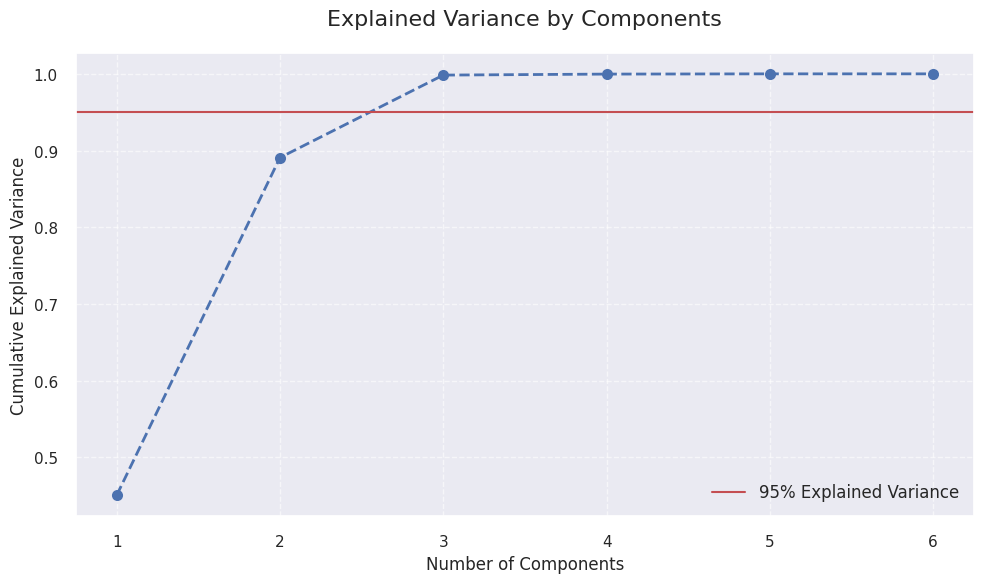

In [31]:
# Grafica de la varianza acumulada explicada
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(
    range(1, pca.n_components_ + 1),  # Rango de componentes
    pca.explained_variance_ratio_.cumsum(),  # Varianza acumulada explicada
    marker='o',  # Marcador para cada punto
    linestyle='--',  # Estilo de línea
    color='b',  # Color de la línea
    linewidth=2,  # Grosor de la línea
    markersize=8  # Tamaño de los marcadores
)

# Añadir una línea horizontal para el umbral de varianza (opcional)
plt.axhline(y=0.95, color='r', linestyle='-', linewidth=1.5, label='95% Explained Variance')  # Línea de umbral

# Títulos y etiquetas
plt.title('Explained Variance by Components', fontsize=16, pad=20)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)

# Añadir una cuadrícula para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la leyenda
plt.legend(loc='lower right', fontsize=12)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

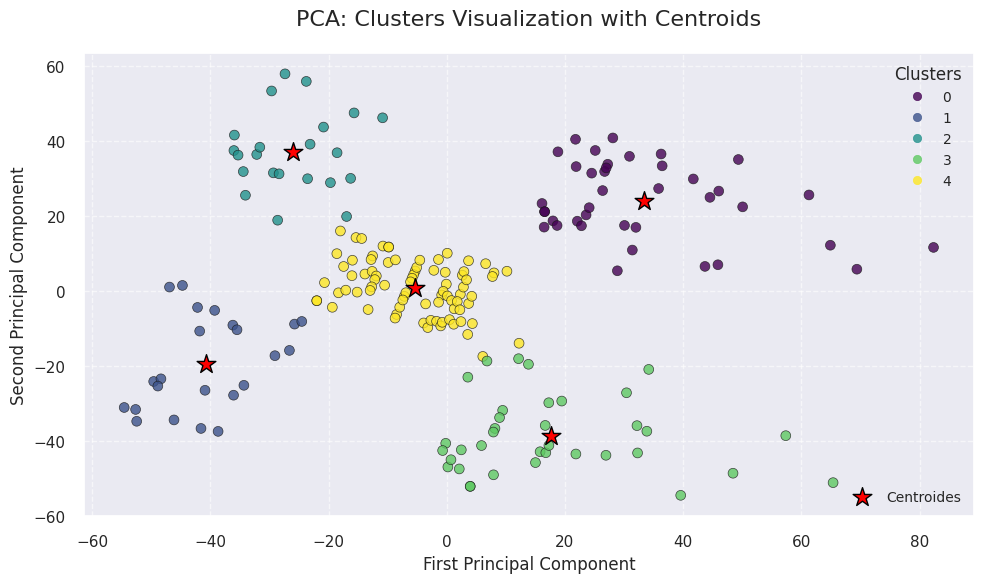

In [32]:
# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
x = pca_data[:, 0]  # Primer componente principal
y = pca_data[:, 1]  # Segundo componente principal

# Transformar los centroides de K-Means al espacio de PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
centroids_x = centroids_pca[:, 0]  # Primer componente principal de los centroides
centroids_y = centroids_pca[:, 1]  # Segundo componente principal de los centroides

# Graficar los clusters
plt.figure(figsize=(10, 6))  # Tamaño de la figura
scatter = plt.scatter(
    x=x,  # Eje x: primer componente principal
    y=y,  # Eje y: segundo componente principal
    c=kmeans.labels_,  # Colores según las etiquetas de los clusters
    s=50,  # Tamaño de los puntos
    cmap='viridis',  # Mapa de colores
    alpha=0.8,  # Transparencia de los puntos
    edgecolor='k',  # Borde negro para los puntos
    linewidth=0.5  # Grosor del borde
)

# Graficar los centroides
plt.scatter(
    x=centroids_x,  # Eje x: primer componente principal de los centroides
    y=centroids_y,  # Eje y: segundo componente principal de los centroides
    s=200,  # Tamaño de los centroides
    c='red',  # Color de los centroides
    marker='*',  # Forma de los centroides (estrella)
    edgecolor='black',  # Borde negro para los centroides
    linewidth=1,  # Grosor del borde
    label='Centroides'  # Etiqueta para la leyenda
)

# Títulos y etiquetas
plt.title('PCA: Clusters Visualization with Centroids', fontsize=16, pad=20)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)

# Añadir una leyenda para los clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", fontsize=10, loc='upper right')
plt.gca().add_artist(legend1)

# Añadir una leyenda para los centroides
plt.legend(loc='lower right', fontsize=10)

# Añadir una cuadrícula para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

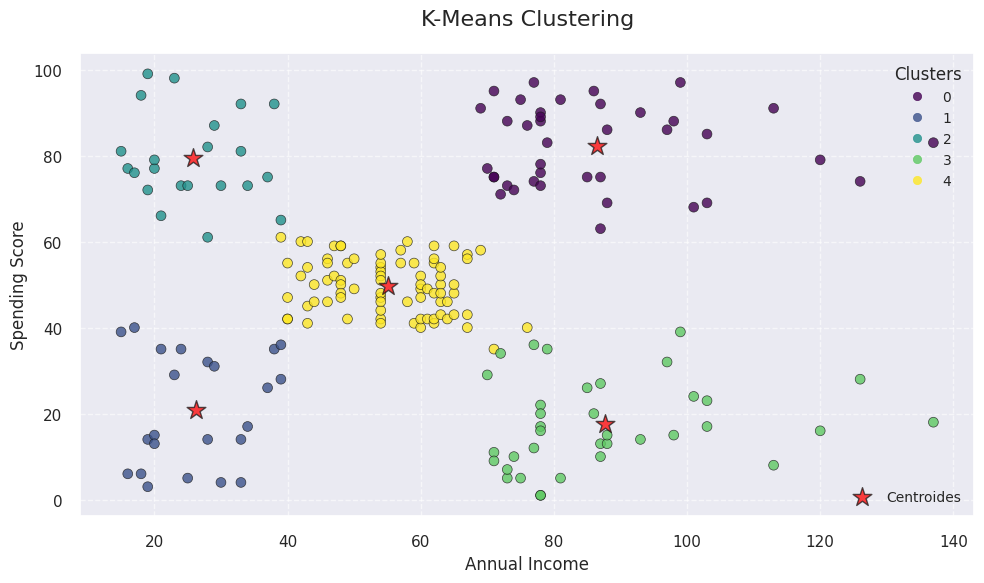

In [33]:
# Grafica de los puntos de datos coloreados por cluster
plt.figure(figsize=(10, 6))  # Tamaño de la figura
scatter = plt.scatter(
    x=X[:, 0],  # Primera característica (por ejemplo, Annual Income)
    y=X[:, 1],  # Segunda característica (por ejemplo, Spending Score)
    c=kmeans.labels_,  # Colores según las etiquetas de los clusters
    s=50,  # Tamaño de los puntos
    cmap='viridis',  # Mapa de colores
    alpha=0.8,  # Transparencia de los puntos
    edgecolor='k',  # Borde negro para los puntos
    linewidth=0.5  # Grosor del borde
)

# Graficar los centroides de los clusters
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],  # Coordenada x de los centroides
    centers[:, 1],  # Coordenada y de los centroides
    c='red',  # Color de los centroides
    s=200,  # Tamaño de los centroides
    alpha=0.75,  # Transparencia de los centroides
    marker='*',  # Forma de los centroides (estrella)
    edgecolor='k',  # Borde negro para los centroides
    linewidth=1,  # Grosor del borde
    label='Centroides'  # Etiqueta para la leyenda
)

# Títulos y etiquetas
plt.title('K-Means Clustering', fontsize=16, pad=20)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)

# Añadir una leyenda para los clusters
legend = plt.legend(*scatter.legend_elements(), title="Clusters", fontsize=10, loc='upper right')
plt.gca().add_artist(legend)

# Añadir una leyenda para los centroides
plt.legend(loc='lower right', fontsize=10)

# Añadir una cuadrícula para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

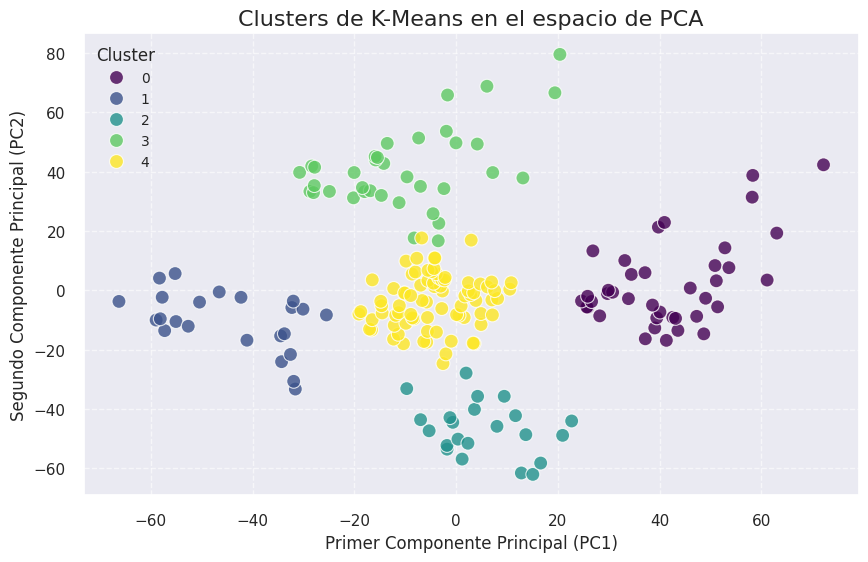

In [34]:
# Grafica de los clusters de K-Means en el espacio de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1',  # Primer componente principal
    y='PC2',  # Segundo componente principal
    hue='KMeans_Cluster',  # Colores según los clusters de K-Means
    data=data,  # DataFrame
    palette='viridis',  # Mapa de colores
    s=100,  # Tamaño de los puntos
    alpha=0.8  # Transparencia
)
plt.title('Clusters de K-Means en el espacio de PCA', fontsize=16)
plt.xlabel('Primer Componente Principal (PC1)', fontsize=12)
plt.ylabel('Segundo Componente Principal (PC2)', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [35]:
# Agrupar por cluster de K-Means y calcular estadísticas de PC1 y PC2
cluster_stats = data.groupby('KMeans_Cluster')[['PC1', 'PC2']].agg(['mean', 'std'])
print(cluster_stats)

                      PC1                   PC2           
                     mean        std       mean        std
KMeans_Cluster                                            
0               41.583353  11.846083   2.158270  14.405222
1              -44.266206  12.441491 -10.386101  10.026023
2                5.330127   8.982999 -46.637861   8.978165
3              -10.278151  13.458449  40.865005  13.668193
4               -4.385967   7.278269  -3.629993   8.840369


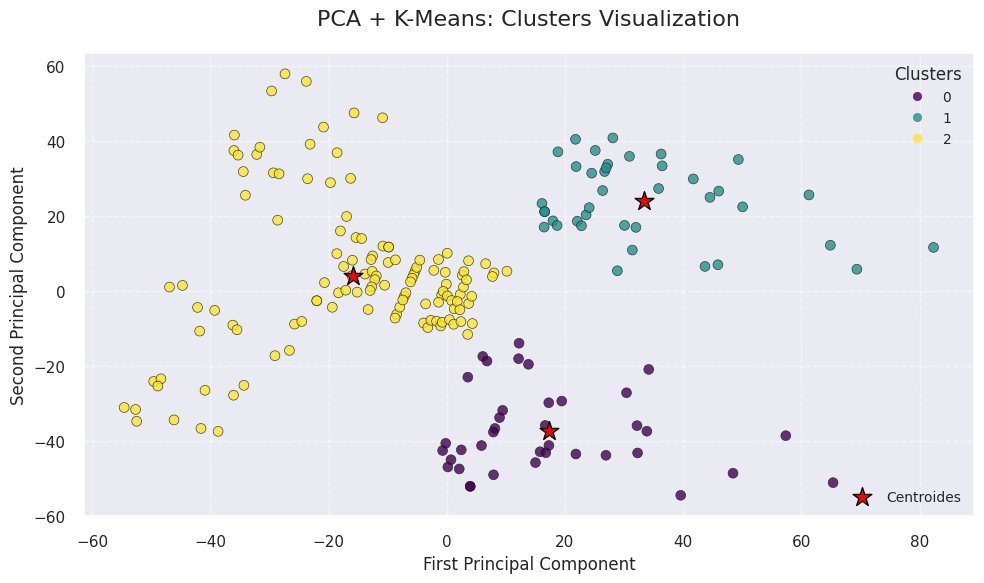

In [36]:
# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Aplicar K-Means a los componentes principales
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_

# Graficar los clusters en el espacio de PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=pca_data[:, 0],  # Primer componente principal
    y=pca_data[:, 1],  # Segundo componente principal
    c=labels,  # Colores según las etiquetas de los clusters
    s=50,  # Tamaño de los puntos
    cmap='viridis',  # Mapa de colores
    alpha=0.8,  # Transparencia de los puntos
    edgecolor='k',  # Borde negro para los puntos
    linewidth=0.5  # Grosor del borde
)

# Graficar los centroides en el espacio de PCA
centroids_pca = kmeans.cluster_centers_
plt.scatter(
    x=centroids_pca[:, 0],  # Primer componente principal de los centroides
    y=centroids_pca[:, 1],  # Segundo componente principal de los centroides
    s=200,  # Tamaño de los centroides
    c='red',  # Color de los centroides
    marker='*',  # Forma de los centroides (estrella)
    edgecolor='black',  # Borde negro para los centroides
    linewidth=1,  # Grosor del borde
    label='Centroides'  # Etiqueta para la leyenda
)

# Títulos y etiquetas
plt.title('PCA + K-Means: Clusters Visualization', fontsize=16, pad=20)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)

# Añadir una leyenda para los clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", fontsize=10, loc='upper right')
plt.gca().add_artist(legend1)

# Añadir una leyenda para los centroides
plt.legend(loc='lower right', fontsize=10)

# Añadir una cuadrícula para mejor legibilidad
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()